<a href="https://colab.research.google.com/github/khadijabendib/IoT-IA/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import seaborn as sns


In [73]:
df = pd.read_csv("L3IA.csv",sep=';',decimal=',')
print(df.head())
df['DateTime'] = pd.to_datetime(df['DateTime'],unit='s')
df

     DateTime  CO2  Temperature  Humidity
0  1647840265  427    19.799999        32
1  1647840874  412    19.799999        32
2  1647841034  408    19.799999        32
3  1647841477  408    19.799999        32
4  1647841990  399    19.799999        31


,DateTime,CO2,Temperature,Humidity
0,2022-03-21 05:24:25,427,19.799999,32
1,2022-03-21 05:34:34,412,19.799999,32
2,2022-03-21 05:37:14,408,19.799999,32
3,2022-03-21 05:44:37,408,19.799999,32
4,2022-03-21 05:53:10,399,19.799999,31
...,...,...,...,...
3147,2022-03-26 23:22:41,435,21.200001,31
3148,2022-03-26 23:32:43,430,21.200001,31
3149,2022-03-26 23:38:13,427,21.200001,31
3150,2022-03-26 23:42:46,427,21.200001,31


Le code utilise la bibliothèque matplotlib en Python pour créer un graphique en 3D avec une figure de taille 9x9. En utilisant la fonction plt.axes(projection='3d'), je crée un ensemble d'axes en 3D. Ensuite, en utilisant la méthode scatter3D, je crée un nuage de points en 3D en utilisant les données des colonnes 'CO2', 'Temperature' et 'Humidity' du DataFrame. Cette visualisation me permet de visualiser les relations entre ces trois variables dans un espace tridimensionnel, ce qui peut être utile pour comprendre leur comportement conjoint.

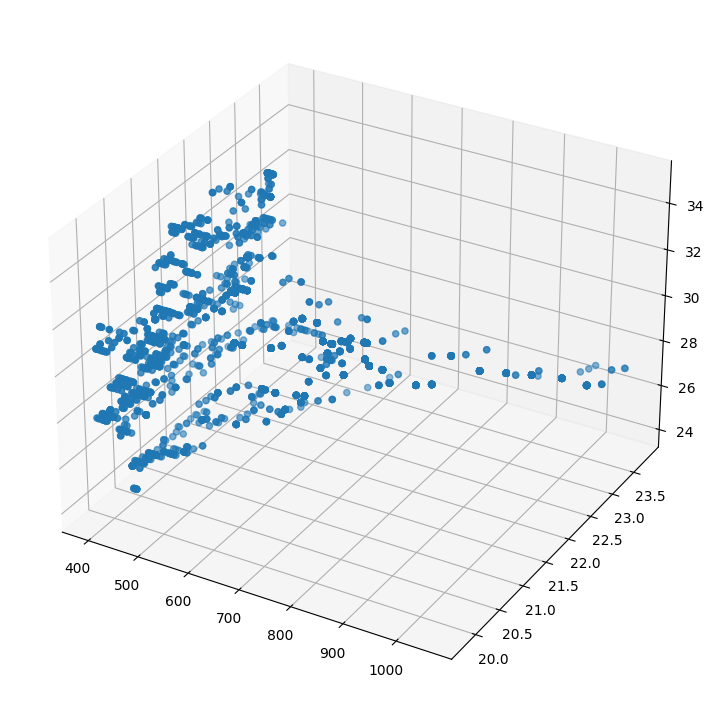

In [74]:
plt.figure(figsize=(9,9))
plot_axes=plt.axes(projection='3d')
plot_axes.scatter3D(df['CO2'],df['Temperature'],df['Humidity'])

<Axes: xlabel='CO2', ylabel='Temperature'>

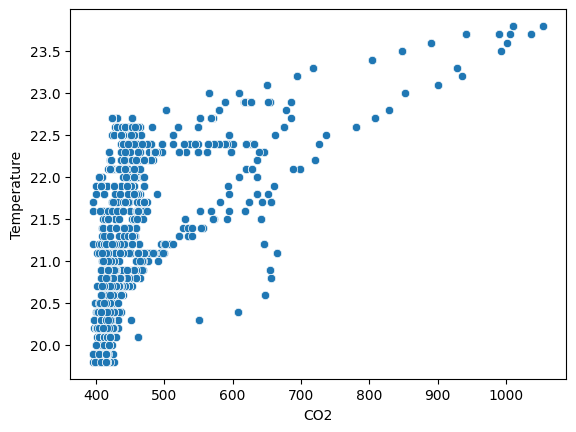

In [75]:
sns.scatterplot(data=df,x='CO2',y='Temperature')

<Axes: xlabel='CO2', ylabel='Humidity'>

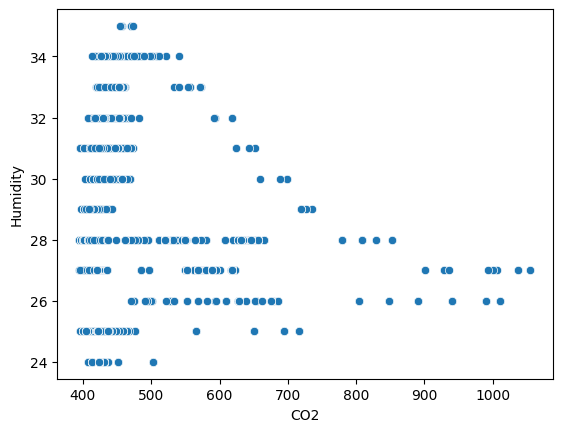

In [76]:
sns.scatterplot(data=df,x='CO2',y='Humidity')

<Axes: xlabel='Temperature', ylabel='Humidity'>

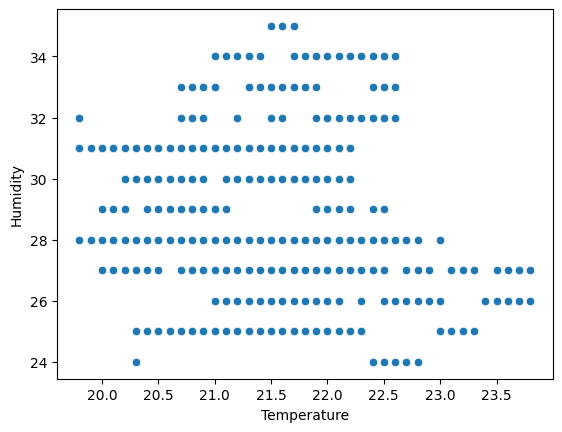

In [77]:
sns.scatterplot(data=df,x='Temperature',y='Humidity')

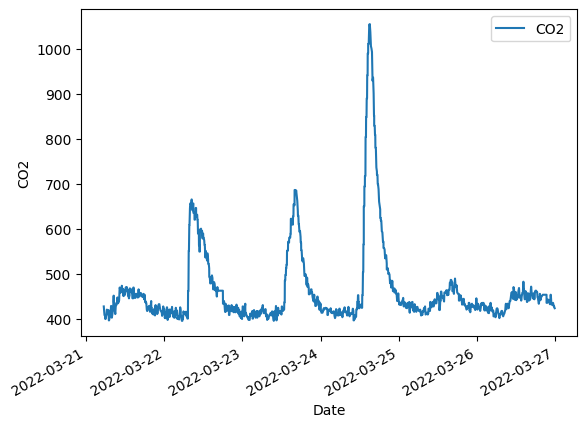

In [78]:
df = df.set_index('DateTime')

df[['CO2']].plot()
plt.xlabel('Date')
plt.ylabel('CO2')
plt.show()


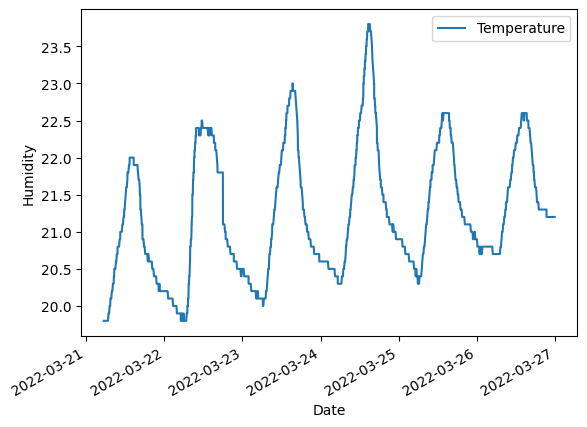

In [79]:
df[['Temperature']].plot()
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.show()


In [69]:
df

,DateTime,CO2,Temperature,Humidity
0,2022-03-21 05:24:25,427,19.799999,32
1,2022-03-21 05:34:34,412,19.799999,32
2,2022-03-21 05:37:14,408,19.799999,32
3,2022-03-21 05:44:37,408,19.799999,32
4,2022-03-21 05:53:10,399,19.799999,31
...,...,...,...,...
3147,2022-03-26 23:22:41,435,21.200001,31
3148,2022-03-26 23:32:43,430,21.200001,31
3149,2022-03-26 23:38:13,427,21.200001,31
3150,2022-03-26 23:42:46,427,21.200001,31


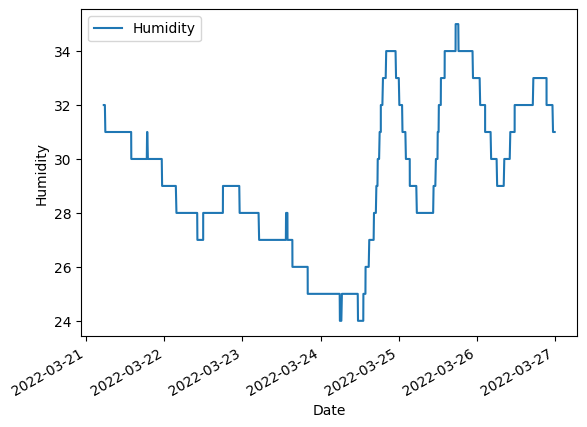

In [80]:
df[['Humidity']].plot()
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.show()

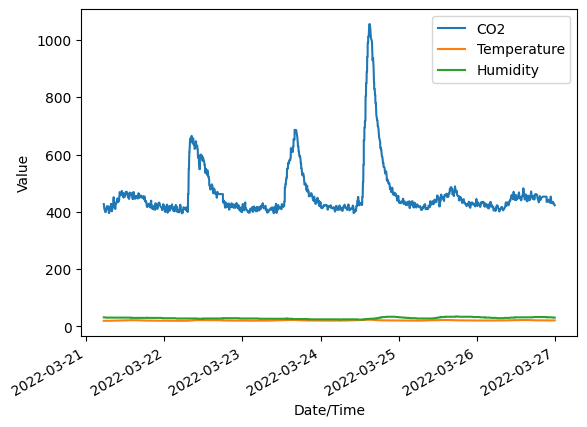

In [81]:

df[['CO2', 'Temperature', 'Humidity']].plot()
plt.xlabel('Date/Time')
plt.ylabel('Value')
plt.show()

In [14]:
print(df.columns)

Index(['DateTime', 'CO2', 'Temperature', 'Humidity'], dtype='object')


In [15]:
def Clustering(data, nbre):
  means = []
  inertias = []
  for k in range(1, nbre):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', n_init="auto")
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  # Generate the elbow plot
  fig = plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel("Number of Clusters")
  plt.ylabel("Inertia")
  plt.grid(True)
  plt.show()

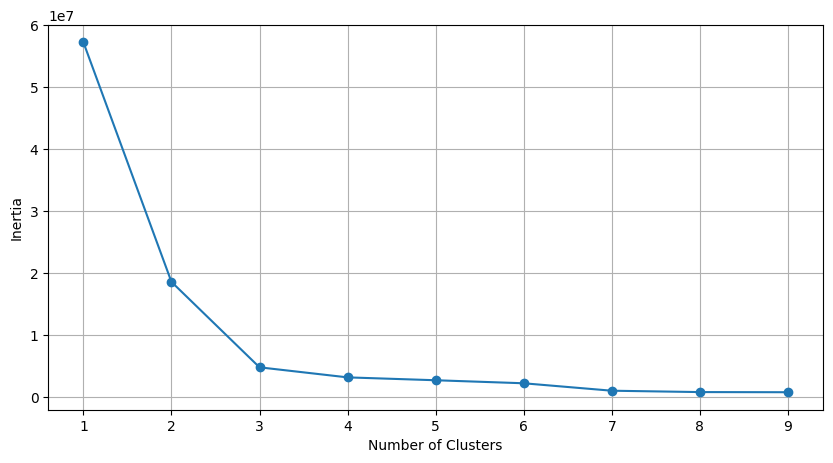

In [16]:
m=df[['Temperature','CO2','Humidity']]
Clustering(m, 10)

In [17]:
k_means=KMeans(init="k-means++",n_clusters=2,n_init="auto")
y=k_means.fit_predict(m)

In [18]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [19]:
np.count_nonzero(y==1)

869

In [20]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
df['labels']=y

In [22]:
df

,DateTime,CO2,Temperature,Humidity,labels
0,2022-03-21 05:24:25,427,19.799999,32,0
1,2022-03-21 05:34:34,412,19.799999,32,0
2,2022-03-21 05:37:14,408,19.799999,32,0
3,2022-03-21 05:44:37,408,19.799999,32,0
4,2022-03-21 05:53:10,399,19.799999,31,0
...,...,...,...,...,...
3147,2022-03-26 23:22:41,435,21.200001,31,0
3148,2022-03-26 23:32:43,430,21.200001,31,0
3149,2022-03-26 23:38:13,427,21.200001,31,0
3150,2022-03-26 23:42:46,427,21.200001,31,0


In [25]:
df

,DateTime,CO2,Temperature,Humidity,labels
0,2022-03-21 05:24:25,427,19.799999,32,0
1,2022-03-21 05:34:34,412,19.799999,32,0
2,2022-03-21 05:37:14,408,19.799999,32,0
3,2022-03-21 05:44:37,408,19.799999,32,0
4,2022-03-21 05:53:10,399,19.799999,31,0
...,...,...,...,...,...
3147,2022-03-26 23:22:41,435,21.200001,31,0
3148,2022-03-26 23:32:43,430,21.200001,31,0
3149,2022-03-26 23:38:13,427,21.200001,31,0
3150,2022-03-26 23:42:46,427,21.200001,31,0


In [29]:
df.dtypes

DateTime       datetime64[ns]
CO2                     int64
Temperature           float64
Humidity                int64
labels                  int32
dtype: object

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Diviser les données en features (X) et target (y)
df=df[['CO2','Temperature','Humidity']]
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle KNN avec k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle sur l'ensemble d'entraînement
knn.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN : {:.2f}%".format(accuracy * 100))

Précision du modèle KNN : 77.02%


In [33]:
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc
# !pip install pypandoc

In [42]:
!cp '/content/drive/MyDrive/Colab Notebooks/Projet.ipynb' ./
!jupyter nbconvert --to PDF "Projet.ipynb"

[NbConvertApp] Converting notebook Projet.ipynb to PDF
[NbConvertApp] Support files will be in Projet_files/
[NbConvertApp] Making directory ./Projet_files
[NbConvertApp] Making directory ./Projet_files
[NbConvertApp] Making directory ./Projet_files
[NbConvertApp] Making directory ./Projet_files
[NbConvertApp] Making directory ./Projet_files
[NbConvertApp] Making directory ./Projet_files
[NbConvertApp] Making directory ./Projet_files
[NbConvertApp] Making directory ./Projet_files
[NbConvertApp] Making directory ./Projet_files
[NbConvertApp] Writing 46589 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 376656 bytes to Projet.pdf


In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/Projet.ipynb' ./
!jupyter nbconvert --to PDF "Projet.ipynb"